# The AD-AS curve and supply shocks

Imports and set magics:

In [417]:
import numpy as np
from scipy import optimize
import scipy.optimize as opt
import sympy as sm
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description of the AD-AS model 


**In a closed economy on the short run**

The AD-AS model is a model from macroeconomics that describes the relationship between aggregate demand (AD) and aggregate supply (AS) in the short run. The model can be used to analyze how changes in government spending, taxes and monetary policy affect the output, prices and employment.

The model below is inspired from the textbook "Introducing Advanced Macroeconomics - Growth and Business Cycles" by Peter Birch Sørensen og Hans Jørgen Whitta-Jacobsen. 

Following five equations describe a closed economy:

**1) The Fischer Equation**:

$$
r = i-\pi^{e}_{+1}
$$

**2) The general market equilibrium**

$$
y-\bar{y} = \alpha_1 (g-\bar{g}) - \alpha_2(r-\bar{r})
$$

**3) The Taylor Rule**

$$
i = \bar{r} + \pi^{e}_{+1} + h(\pi - \pi^*) + b(y- \bar{y})
$$

**4) The SRAS curve** which is derived from the Expectations-Augmented Phillips Curve

$$
\pi = \pi^e + \gamma (y-\bar{y}) + s
$$


**5) Assuming static inflation expectations in the economy**

$$
\pi^e = \pi_{-1}
$$




The **AD-curve** is given by a combination of equation 1), 2) and 3):

$$
y-\bar{y} = z-\alpha(\pi - \pi^*)
$$
where
$$
z = \frac{\alpha_1}{1+\alpha_2b}(g-\bar{g}), \alpha = \frac{\alpha_2 h}{1+\alpha_2b}
$$

The **AS-curve** is given by a combination of equation 4) and 5):

$$
\pi = \pi_{-1} + \gamma(y-\bar{y}) + s

Explanation of the two curves: The **AD curve** represents the relationship between output, Y, and aggregate demand, AD, while the **AS curve** represents the relationship between output, Y, and aggregate supply, AS. 

**Alpha** is a function of the sensitivity of real interest rates,**h** to changes in the output gap and the slope of the Phillips curve, **b**.

**Gamma** is the slope of the AS-curve and **s** represents supply shocks.


Equilibrium: The equilibrium condition for the AD-AS-model is where the two curves intersect.




## Analytical solution

I start by defing the AD- and AS-curve using the equations above:

In [418]:
#Defining the symbols using sympy
y, pi, g, b, alpha1, alpha2, h, s, y_bar, pi_star = sm.symbols('y pi g b alpha1 alpha2 h s y_bar pi_star')

#Defining the AD-curve
z = alpha1/(1 + alpha2*b)*(g - y_bar)
alpha = alpha2*h/(1 + alpha2*b)
AD = y - y_bar - alpha*(pi - pi_star) - z

#Defining the AS-curve
gamma = sm.symbols('gamma')
AS = pi - pi_star + gamma*(y - y_bar) + s

I then derive the steady state equation. This is done by setting AD and AS equal to each other and then solving for y:

In [419]:
#Steady state equation
steady_state_eq = sm.solve(sm.Eq(AD, AS), y)[0]


I now use lambdify to turn it into a Python function:

In [420]:
#Using lambdify to define the SS function
#ss_func takes in the parameters of the model and returns the value of y at SS

ss_func = sm.lambdify((pi, g, b, alpha1, alpha2, h, s, y_bar, pi_star, gamma), steady_state_eq)


I now want to study the AD-AS model when a supply shock hits the economy. I use ipywidgets to illustrate how a supply shock, s, affects the AD- and AS-curve. In period 0 the economy is in its long-term equilibrium. However, in period one the user can make a temporary, negative or positive supply shock in the range -5 to +5. Remember: A supply shock is negative when s > 0 and positive when s > 0.  S is 0 in period zero and two, but in period 1 the user can change the value.



In [421]:
#Defining functions for the AD and AS curves
def ad(y, pi, pi_star, alpha, alpha_1, alpha_2, b, g, g_bar, h):
    z = alpha_1 / (1 + alpha_2 * b) * (g - g_bar)
    return y - y_bar - z + alpha * (pi - pi_star)

def as_curve(y, pi, pi_1, gamma, s):
    return pi - pi_1 - gamma * (y - y_bar) - s

#Defining the parameter values
y_bar = 100
pi_star = 2
alpha_1 = 1
alpha_2 = 1
b = 1
g = 1
g_bar = 1
h = 1
alpha = alpha_2 * h / (1 + alpha_2 * b)
gamma = 0.5

#Defining a function to plot the AD and AS curves
def plot_ad_as(s):
    #Creating a range of output levels
    y_range = np.linspace(y_bar - 10, y_bar + 10, 100)

    #Deriving the AD and AS curves
    ad_curve = ad(y_range, pi_star, pi_star, alpha, alpha_1, alpha_2, b, g, g_bar, h)
    as_curve_0 = as_curve(y_range, pi_star, pi_star, gamma, 0)
    as_curve_1 = as_curve(y_range, pi_star, pi_star, gamma, s)

    #Plotting
    plt.plot(y_range, ad_curve, label='AD')
    plt.plot(y_range, as_curve_0, label='AS (s=0)', color='grey')
    plt.plot(y_range, as_curve_1, label='AS (s={:.2f})'.format(s), color='red')

    
    plt.xlabel('Output')
    plt.ylabel('Inflation')
    plt.legend()

#Creating the interactive plot with a slider 
interact(plot_ad_as, s=FloatSlider(min=-5, max=5, step=0.1, value=0));


interactive(children=(FloatSlider(value=0.0, description='s', max=5.0, min=-5.0), Output()), _dom_classes=('wi…

It is worth noting, that the AD curve is upward sloping and the AS curve is downward sloping in this model. This is due to the assumptions that are made. For example, an increase in the price level leads to an increase in aggregate demand. This can be counterintuitive, because one would think a higher price level leads to a decrease in demand. But in this case, it is due to the effect of higher inflation on the real interest rate, which thereby affects consumption and investments.




**Steady state calculation**

In [422]:
#Defining the parameter values again
y_bar = 100
pi_star = 2
alpha_1 = 1
alpha_2 = 1
b = 1
g = 1
g_bar = 1
h = 1
gamma = 0.5

#Calculating steady state value assuming no supply shocks
steady_state = ss_func(pi_star, g, b, alpha_1, alpha_2, h, 0, y_bar, pi_star, gamma)

#Printing the result
print("The steady state value is:", steady_state)


The steady state value is: 1.0


## Numerical solution: Minimizing social loss 

To solve an optimization problem in a AD-AS model, it is very appropriate to look a the social loss function. The social loss function measures the welfare loss that the society experiences due to the economy deviating from its optimal state. It is therefore essential to minimize the social loss function. This can be done by finding the optimal parameter values, that minimixes the following equation:

$$
L=(\pi-\pi^{*})^{2}+a(y-\bar{y})^{2}

$$

Where $\pi$ is the actual inflation rate, $\pi^{*}$ is the target inflation rate, $y$ is the actual output level, $\bar{y}$ is the natural output level and $a$ is a parameter that determines the weight given to the output gap in the loss function.

In [423]:
# Fixing the parameter values
pi = 0.02
b = 0.5
alpha2 = 1
h = 0.5
s = 0
y_bar = 100 
pi_star = 0.02
gamma = 0.5

# Defining the social loss function with fixed parameters
def social_loss(args):
    g, alpha1 = args
    y = ss_func(pi, g, b, alpha1, alpha2, h, s, y_bar, pi_star, gamma)
    return (y_bar - y) ** 2 + (pi_star - pi) ** 2

# Initial values for the varying parameters
initial_g = 0.03
initial_alpha1 = 1.5

# Optimizing the social loss function with respect to g and alpha1 using the trust-constr method
optimal_par_gh = opt.minimize(social_loss, [initial_g, initial_alpha1], method='trust-constr')

print("The optimal parameter values that minimize the social loss are:")
print("g:", optimal_par_gh.x[0])
print("alpha1:", optimal_par_gh.x[1])




The optimal parameter values that minimize the social loss are:
g: 0.04500637346159248
alpha1: 1.8421020773482135e-12


To verify that the optimal parameter values for g and alpha1 truly minimize the social loss function, I evaluate the social loss function at these optimal parameter values and compare it with the social loss values obtained from other parameter combinations.

In [424]:
#Evaluating the social loss at the optimal parameter values
optimal_g = optimal_par_gh.x[0]
optimal_alpha1 = optimal_par_gh.x[1]
optimal_social_loss = social_loss([optimal_g, optimal_alpha1])

#Generating a range of parameter combinations
g_values = np.linspace(0, 0.1, 100)   #Generating 100 equally spaced values between 0 and 0.1 for parameter g
alpha1_values = np.linspace(0, 3, 100)   #Generating 100 equally spaced values between 0 and 3 for parameter alpha1
social_loss_values = np.zeros((100, 100))   #Creating a 100x100 array to store social loss values

#Calculating social loss for each parameter combination
for i, g in enumerate(g_values):
    for j, alpha1 in enumerate(alpha1_values):
        social_loss_values[i, j] = social_loss([g, alpha1])   #Calculating social loss for each parameter combination

#Finding the minimum social loss and its corresponding parameter values
min_loss = np.min(social_loss_values)   #Finding the minimum social loss value from the array
min_loss_idx = np.unravel_index(np.argmin(social_loss_values), social_loss_values.shape)   #Finding the indices of the minimum loss value
min_loss_g = g_values[min_loss_idx[0]]   #Extracting the corresponding value of g for the minimum loss
min_loss_alpha1 = alpha1_values[min_loss_idx[1]]   #Extracting the corresponding value of alpha1 for the minimum loss

#Compare the optimal social loss with the minimum social loss
if np.isclose(optimal_social_loss, min_loss):
    print("The optimal parameter values do indeed minimize the social loss function.")   #Text indicating that the optimal parameter values minimize the social loss function
else:
    print("The optimal parameter values may not minimize the social loss function.")   #Text indicating that they may not minimize the social loss function

#Printing the optimal social loss and the minimum social loss
print("Optimal Social Loss:", optimal_social_loss)   #Print the value of the optimal social loss
print("Minimum Social Loss:", min_loss)   #Print the value of the minimum social loss


The optimal parameter values do indeed minimize the social loss function.
Optimal Social Loss: 6.027355254061632e-20
Minimum Social Loss: 0.0


**Conclusion:**

The extremely small optimal social loss value of 6.03e-20 and the minimum social loss value of 0.0 indicate that the chosen parameter values result in an almost perfect fit between the model's output and the desired target. 

# Checking convergence

To check the convergence of the optimization result, I can analyze the change in the social loss function value across iterations. If the social loss function converges to a reaches a minimum, it indicates convergence.

I define a optimization_callback function that is used as a callback during the optimization process to monitor the current social loss value. The result of the optimization is stored in the optimal_par_gh variable.

Current social loss: 39976.0036
Current social loss: 4442.444380918718
Current social loss: 0.0006256893167095972
Current social loss: 9.837157116764578e-13
Current social loss: 9.837157116764578e-13
Current social loss: 6.027355254061632e-20
Current social loss: 6.027355254061632e-20
Current social loss: 6.027355254061632e-20
Current social loss: 6.027355254061632e-20
Current social loss: 6.027355254061632e-20
Current social loss: 6.027355254061632e-20
Current social loss: 6.027355254061632e-20
Current social loss: 6.027355254061632e-20
Current social loss: 6.027355254061632e-20
The optimization has converged.


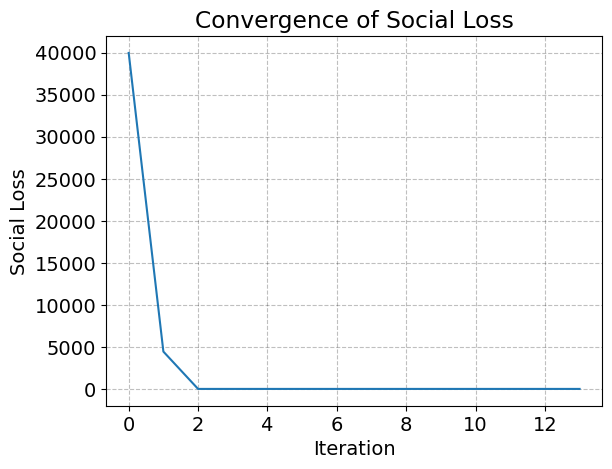

In [425]:
#Defining an empty list to store the social loss values across iterations
social_loss_history = []

#Optimizing with convergence monitoring
def optimization_callback(xk, _):

    #social_loss_val is calculated at each iteration and appendeds it to the social_loss_history list
    social_loss_val = social_loss(xk)
    social_loss_history.append(social_loss_val)
    print("Current social loss:", social_loss_val)

#Optimization using Trust Region Constraint method
#optimal_par_gh minimizes the social_loss function with respect to the parameters [initial_g, initial_alpha1] 
optimal_par_gh = opt.minimize(social_loss, [initial_g, initial_alpha1], method='trust-constr', callback=optimization_callback)

#Checking if the social loss has converged by comparing the last two values in social_loss_history
if len(social_loss_history) > 1 and np.isclose(social_loss_history[-1], social_loss_history[-2]):
    print("The optimization has converged.")
else:
    print("The optimization may not have converged.")

#Plotting the convergence of the social loss function
plt.plot(range(len(social_loss_history)), social_loss_history)
plt.xlabel("Iteration")
plt.ylabel("Social Loss")
plt.title("Convergence of Social Loss")
plt.show()



## Numerical solution: Monetary policy intervention 

One common example of a policy change in an AD-AS model is a monetary policy intervention, such as a change in the central bank's interest rate.

I will now analyze how the steady state value changes, when decreasing the central bank's interest rate. A decrease in the interest rate is typically used to stimulate economic activity.

In [426]:
from monetary_policy_AD_AS import monetary_policy_intervention

# Create an instance of monetary_policy_intervention class
mp = monetary_policy_intervention()

# Set the desired interest rate for the policy intervention (decrease in interest rate)
interest_rate = -0.2

# Analyze the policy intervention
steady_state_before, steady_state_after = mp.analyze_policy_intervention(interest_rate)

# Compare the steady state values
print("Steady state value before policy intervention:", steady_state_before)
print("Steady state value after policy intervention:", steady_state_after)



Steady state value before policy intervention: 1.0
Steady state value after policy intervention: 0.6000000000000085


**Interpretation:**

The policy intervention, which involved decreasing the central bank's interest rate, led to a decrease in the steady state output value from 1.0 to 0.6. This suggests a contractionary effect on the economy due to the lower interest rate.

# Conclusion

Add concise conclusion. 